In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import seaborn as sn

In [3]:
from tensorflow.keras import datasets, layers, models
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape == (60000, 28, 28)

True

In [5]:
X_train[0]
X_train.shape
X_test.shape

(10000, 28, 28)

In [6]:

X_train = X_train / 255
X_test = X_test / 255

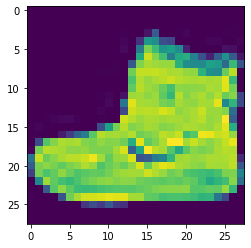

In [7]:
plt.imshow(np.squeeze(X_train[0]))

In [8]:
X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(784, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1168 - accuracy: 0.9559 - val_loss: 0.3739 - val_accuracy: 0.8973
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1052 - accuracy: 0.9600 - val_loss: 0.3954 - val_accuracy: 0.8938
Epoch 3/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1013 - accuracy: 0.9622 - val_loss: 0.4085 - val_accuracy: 0.8975
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0964 - accuracy: 0.9637 - val_loss: 0.4088 - val_accuracy: 0.8953
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0944 - accuracy: 0.9644 - val_loss: 0.4268 - val_accuracy: 0.8983
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0911 - accuracy: 0.9654 - val_loss: 0.4331 - val_accuracy: 0.8968
Epoch 7/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0886 - accuracy: 0.9665 - val_loss: 0.4400 - val_accuracy:

In [13]:
y_pred=cnn.predict(X_test)

In [14]:
print(np.argmax(y_pred[4334]))
print(X_test.shape)

9
(10000, 28, 28, 1)


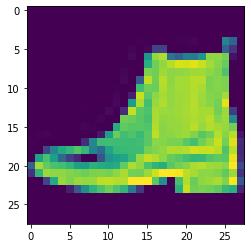

In [16]:
plt.imshow(np.squeeze(X_test[4334]))